**1.Import Library**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import missingno as msno
import seaborn as sns

from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot

from PIL import Image, ImageDraw
import os
import cv2
import xml.etree.ElementTree as gfg 

**2.EDA + Visualization**

Define Train & Test Image path

In [2]:
train_path = '/kaggle/input/object-detection-for-ppe-covid19-dataset/dataset/train'
    
test_path = '/kaggle/input/object-detection-for-ppe-covid19-dataset/dataset/test'

**3. Read Train & Test csv files for EDA**

In [3]:
train_df = pd.read_csv('/kaggle/input/object-detection-for-ppe-covid19-dataset/tf_record_files/train_labels.csv')
test_df = pd.read_csv('/kaggle/input/object-detection-for-ppe-covid19-dataset/tf_record_files/test_labels.csv')

In [4]:
train_df.head()

filename  width  height        class  xmin  ymin  xmax  ymax
0  snap07301.jpg   1920    1088       Gloves   769   568   835   680
1  snap07301.jpg   1920    1088       Gloves   988   557  1043   681
2  snap07301.jpg   1920    1088         Mask   870   151   929   226
3  snap07301.jpg   1920    1088  Face_Shield   842   105   951   244
4  snap07301.jpg   1920    1088     Coverall   748    58  1060   954

In [5]:
test_df.head()

filename  width  height     class  xmin  ymin  xmax  ymax
0  sdh.jpg   1600    1000   Goggles   734    59  1200   336
1  sdh.jpg   1600    1000      Mask   779   224  1147   496
2  sdh.jpg   1600    1000    Gloves   538   628   735   862
3  sdh.jpg   1600    1000    Gloves   868   744  1265   900
4  sdh.jpg   1600    1000  Coverall   292     1  1406   898

**4. Print Shape of each dataframe**

In [6]:
def shape_of_dataset(df, dataset_name="df"):
    
    print(f"{dataset_name} dataset has {df.shape[0]} nrows and {df.shape[1]} ncolumns")
    return df.shape[0], df.shape[1]

In [7]:
train_r, train_c = shape_of_dataset(train_df, "Train")
test_r, test_c = shape_of_dataset(test_df, "Test")

Train dataset has 1614 nrows and 8 ncolumns
Test dataset has 362 nrows and 8 ncolumns


**5. Count total null values in each dataframe**

In [8]:
def count_null_values(df, dataset_name):
    
    num_of_total_null_values = sum(df.isnull().sum().values)
    print(f"{dataset_name} dataset has {num_of_total_null_values} null values")
    return num_of_total_null_values

In [9]:
train_null = count_null_values(train_df, "Train")
test_null = count_null_values(test_df, "Test")

Train dataset has 0 null values
Test dataset has 0 null values


**6. Detect the columns with null values in each dataframe**

In [10]:
def detect_null_columns(df, dataset_name):
    
    col = []
    s = df.isnull().sum()
    for x in range(len(s)):
        if s[x] > 0:
            col.append(s.index[x])
    tot_cols = len(col)
    if tot_cols == 0:
        print(f"{dataset_name} dataset has no null columns")
    else:
        print(f"{dataset_name} dataset has {tot_cols} null columns and they are:")
        for x in col:
            print(x, end=',')
        print()
    return col, len(col)

In [11]:
total_train_null_cols, train_null_cols  = detect_null_columns(train_df, "Train")
total_test_null_cols, test_null_cols  = detect_null_columns(test_df, "Test")

Train dataset has no null columns
Test dataset has no null columns


/tmp/ipykernel_34/1123125975.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



**7. Create dataframe to compare between dataframes**

In [12]:
detailed_db = pd.DataFrame({
    'dataset' : [],
    'nrows' : [],
    'ncols' :[],
    'null_amount' : [],
    'names_of_null_cols' : [],
    'num_null_cols' : []
})

In [13]:
def fill_db_dataset(dataset_name, nrows, ncols, null_amount, name_null_cols, num_null_cols):
    detailed_db.loc[len(detailed_db.index)] = [dataset_name, nrows, ncols, null_amount, ', '.join(name_null_cols), int(num_null_cols)]

In [14]:
fill_db_dataset('Train', train_r, train_c, train_null, total_train_null_cols, train_null_cols)
fill_db_dataset('Test', test_r, test_c, test_null, total_test_null_cols, test_null_cols)

**8. Display info each dataframe**

In [15]:
def print_info_about_ds(df, name_of_the_ds = "df"):
    print(f"Info about the {name_of_the_ds} dataset: ")
    dash_sep()
    print(df.info())
    
def dash_sep(num=50):
    print("_"*num)

def double_fs_sep(num=40):
    print("//"*num)

In [16]:
print_info_about_ds(train_df, "train")
double_fs_sep()

print_info_about_ds(test_df, "test")

Info about the train dataset: 
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  1614 non-null   object
 1   width     1614 non-null   int64 
 2   height    1614 non-null   int64 
 3   class     1614 non-null   object
 4   xmin      1614 non-null   int64 
 5   ymin      1614 non-null   int64 
 6   xmax      1614 non-null   int64 
 7   ymax      1614 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 101.0+ KB
None
////////////////////////////////////////////////////////////////////////////////
Info about the test dataset: 
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  362 non-null    ob

**9. Extract descriptive stats about each dataframe**

In [17]:
train_df.describe().T.style.set_properties(**{"background-color": "blue", "font-size" : "17px",
                                        "color": "#ffffff", "border-radius" : "1px", "border": "1.5px solid black"})

In [18]:
test_df.describe().T.style.set_properties(**{"background-color": "green", "font-size" : "17px",
                                        "color": "#ffffff", "border-radius" : "1px", "border": "1.5px solid black"})

**10. Display number of unique values in each column of the dataframe**

In [19]:
def print_nunique_vals(df, ds_name = 'df'):
    print(f"number of unique values in each column in the {ds_name} dataset:")
    dash_sep(75)
    print(df.nunique())

In [20]:
print_nunique_vals(train_df, 'train')
double_fs_sep()

print_nunique_vals(test_df, 'test')

number of unique values in each column in the train dataset:
___________________________________________________________________________
filename    367
width        54
height       74
class         5
xmin        830
ymin        562
xmax        920
ymax        655
dtype: int64
////////////////////////////////////////////////////////////////////////////////
number of unique values in each column in the test dataset:
___________________________________________________________________________
filename     50
width        35
height       42
class         5
xmin        296
ymin        250
xmax        294
ymax        282
dtype: int64


**11. Plot the distribution of labels in train and test df**

In [21]:
def cat_summary_with_graph(dataframe, col_name):
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Countplot', 'Percentages'),
                        specs=[[{"type": "xy"}, {'type': 'domain'}]])

    fig.add_trace(go.Bar(y=dataframe[col_name].value_counts().values.tolist(),
                         x=[str(i) for i in dataframe[col_name].value_counts().index],
                         text=dataframe[col_name].value_counts().values.tolist(),
                         textfont=dict(size=15),
                         name=col_name,
                         textposition='auto',
                         showlegend=False,
                         marker=dict(color=colors,
                                     line=dict(color='#DBE6EC',
                                               width=1))),
                  row=1, col=1)

    fig.add_trace(go.Pie(labels=dataframe[col_name].value_counts().keys(),
                         values=dataframe[col_name].value_counts().values,
                         textfont=dict(size=20),
                         textposition='auto',
                         showlegend=False,
                         name=col_name,
                         marker=dict(colors=colors)),
                  row=1, col=2)

    fig.update_layout(title={'text': col_name,
                             'y': 0.9,
                             'x': 0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')

    iplot(fig)

colors = ['#494BD3', '#E28AE2', '#F1F481', '#79DB80', '#DF5F5F',
              '#69DADE', '#C2E37D', '#E26580', '#D39F49', '#B96FE3']

In [22]:
cat_summary_with_graph(train_df, 'class')
cat_summary_with_graph(test_df, 'class')

**12. Plot distribution of missing values about df**

In [23]:
def plot_miss_vals(df, ds_name): 
    msno.matrix(df)
    plt.title(f'Distribution of Missing Values in {ds_name} dataset', fontsize=30, fontstyle='oblique')
    plt.show()

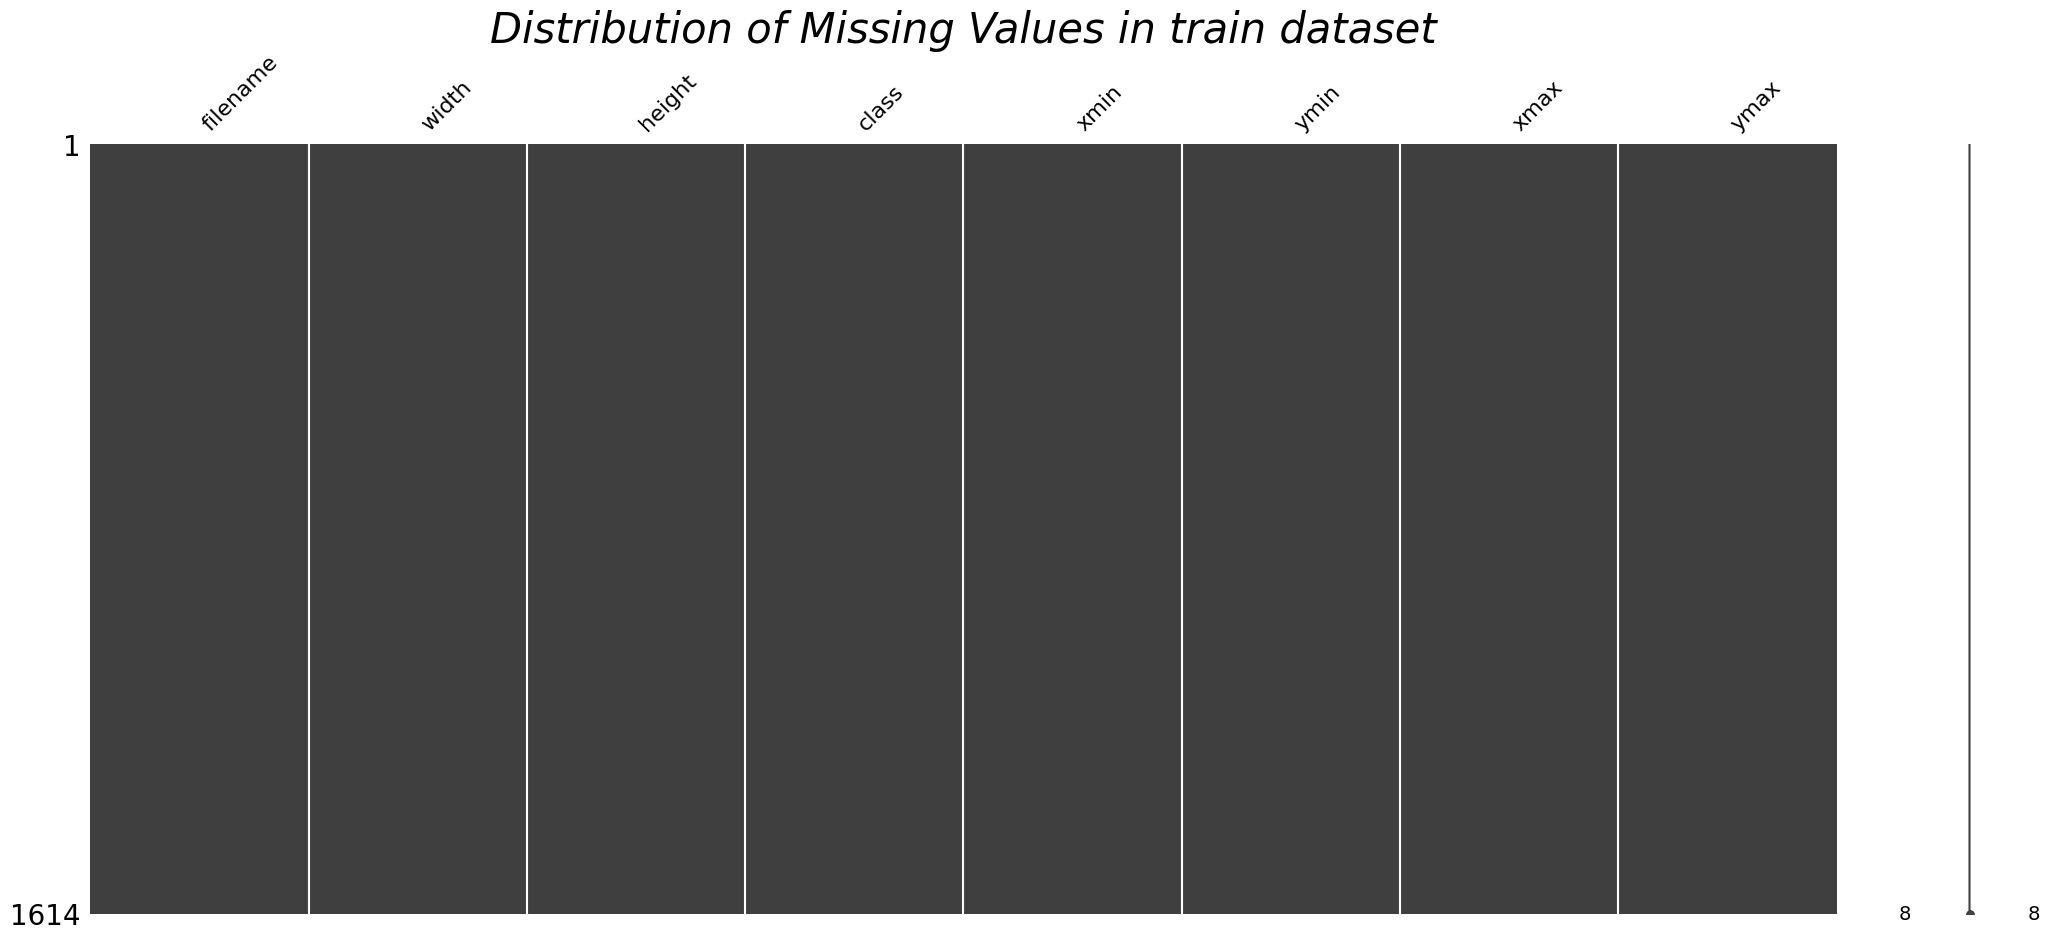

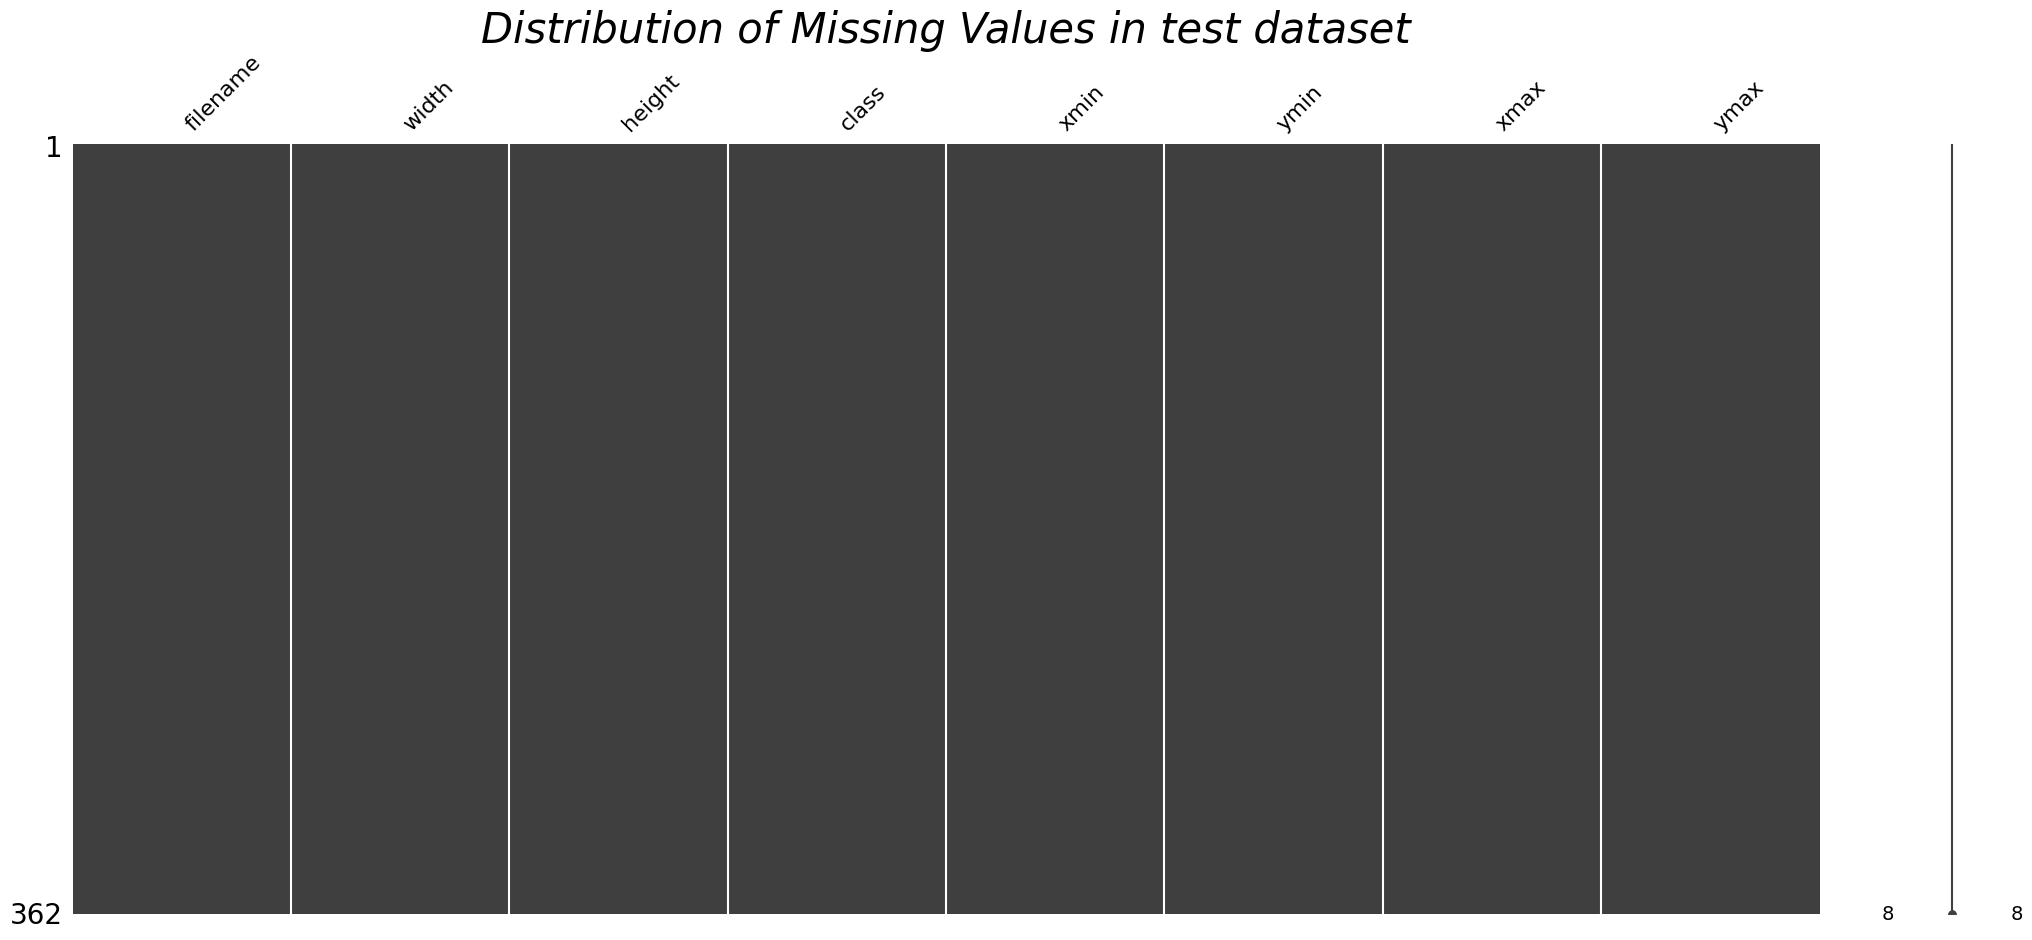

In [24]:
plot_miss_vals(train_df, "train")
plot_miss_vals(test_df, "test")

In [25]:
print(f"We have {train_df['filename'].nunique()} training images")
print(f"We have {test_df['filename'].nunique()} testing images")

We have 367 training images
We have 50 testing images


In [26]:
print(f"We have {train_df.shape[0]} objects in the training dataset")
print(f"We have {test_df.shape[0]} objects in the testing dataset")

We have 1614 objects in the training dataset
We have 362 objects in the testing dataset


**13. Plot Distribution of image resolution in MB**

In [27]:
def plot_img_res(df):
    ps=np.zeros(len(df))
    for i in range(len(df)):
        ps[i]=df['width'][i] * df['height'][i]/1e6
    sns.histplot(x=ps)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



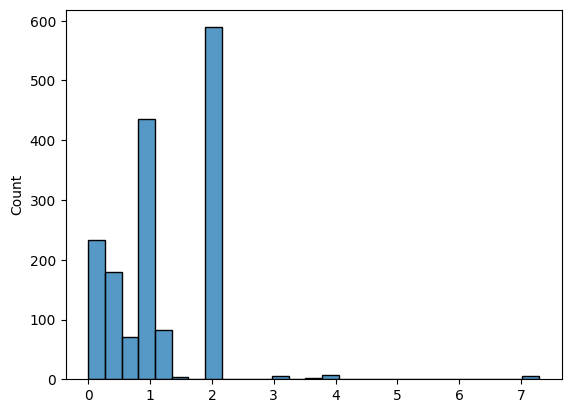

In [28]:
plot_img_res(train_df)

**14. Plot the distribution of Width and Height for each class**

<Figure size 2000x1500 with 0 Axes>

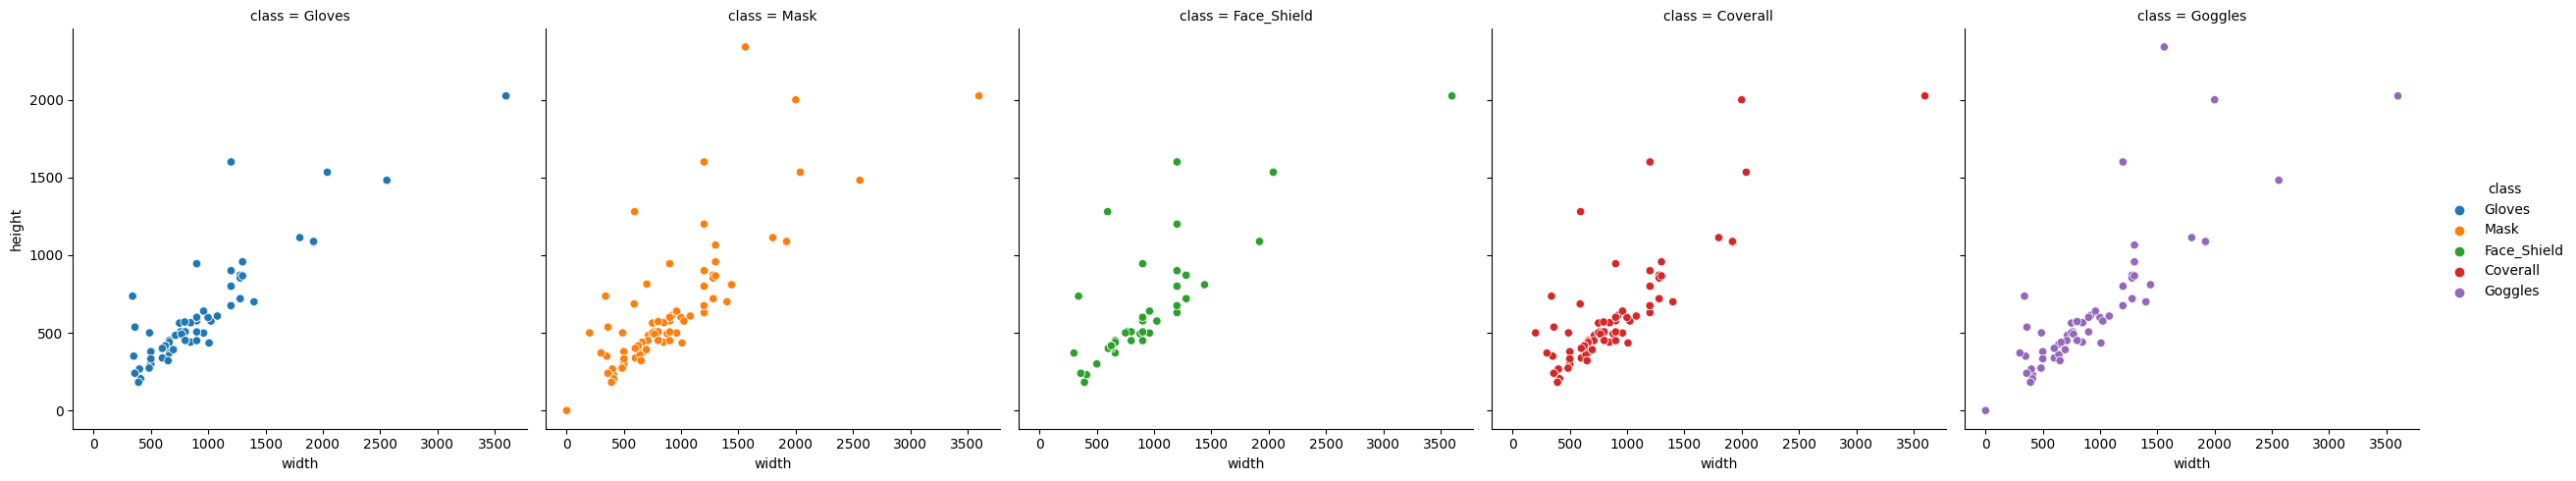

In [29]:
plt.figure(figsize=(20,15))
sns.relplot(x="width", y="height", hue="class", col="class", data=train_df);

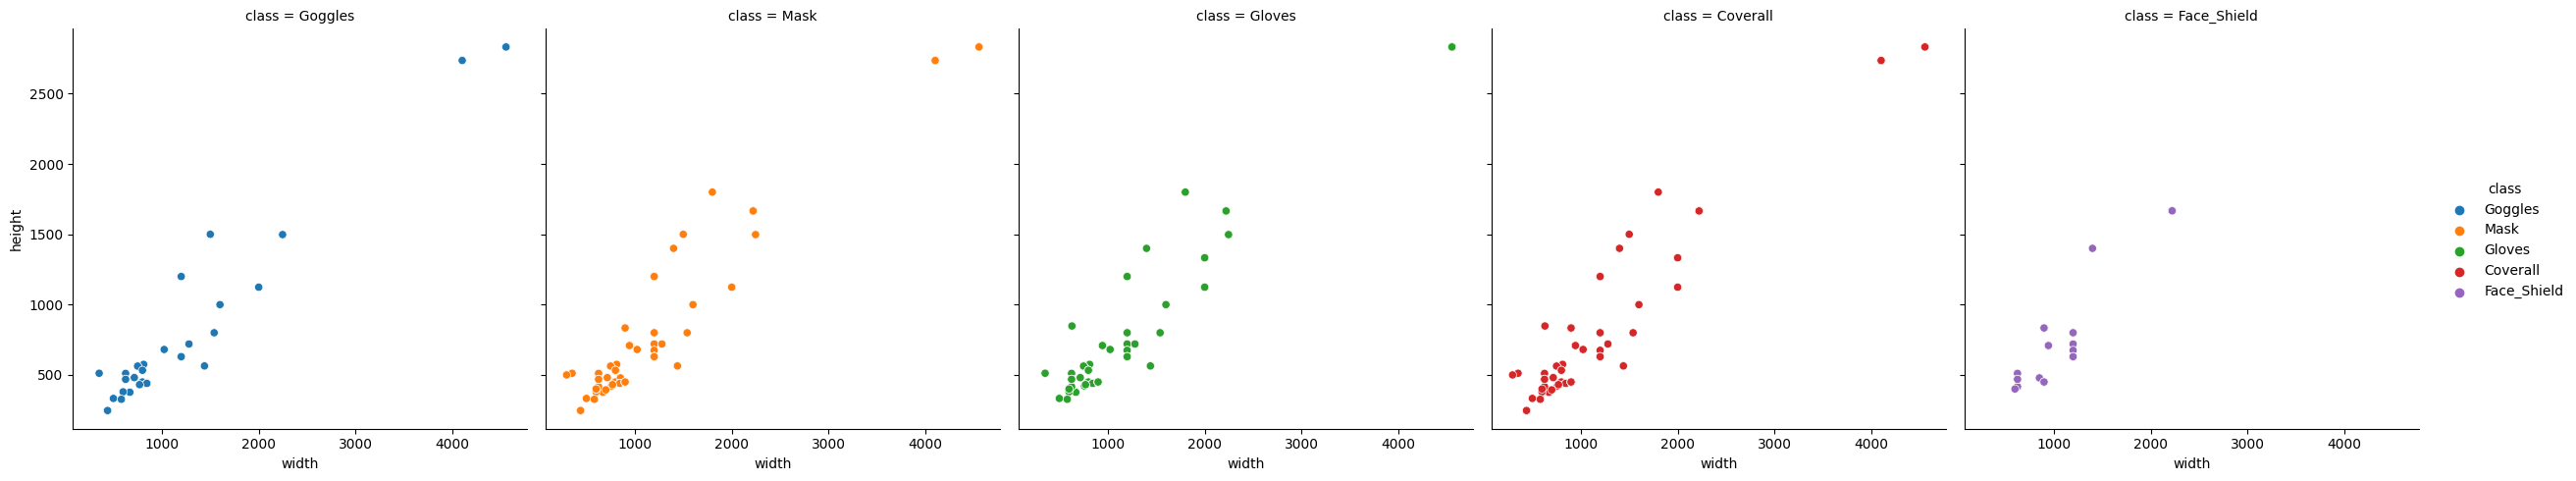

In [30]:
sns.relplot(x="width", y="height", hue="class", col="class", data=test_df);

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version

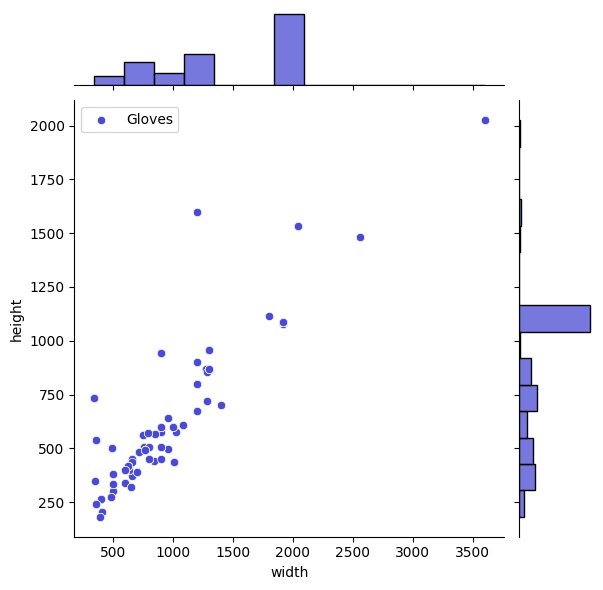

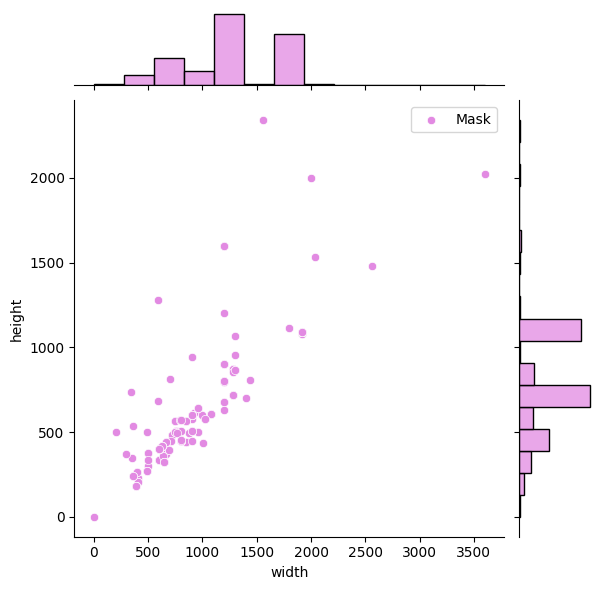

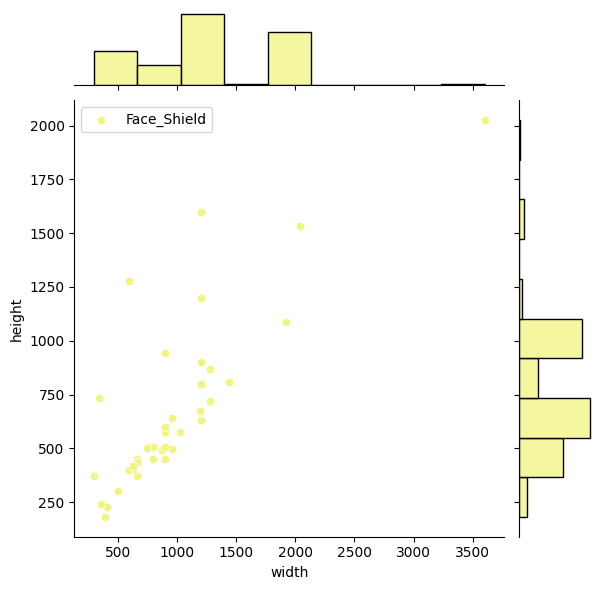

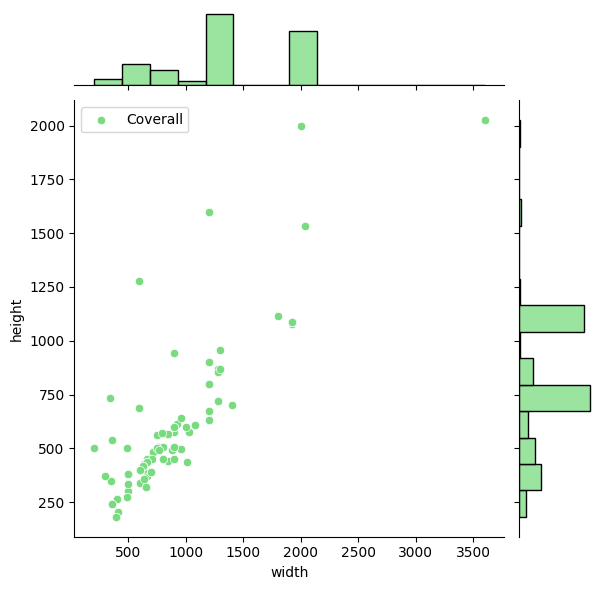

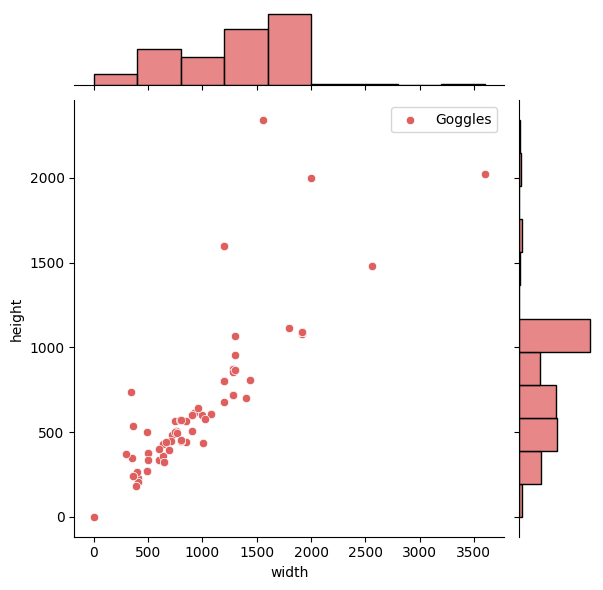

In [31]:
color = 0
for label in train_df['class'].unique():
    sns.jointplot(x="width", y="height", data=train_df.loc[train_df['class'] == label], color=colors[color])
    plt.legend(labels=[label])
    color+=1

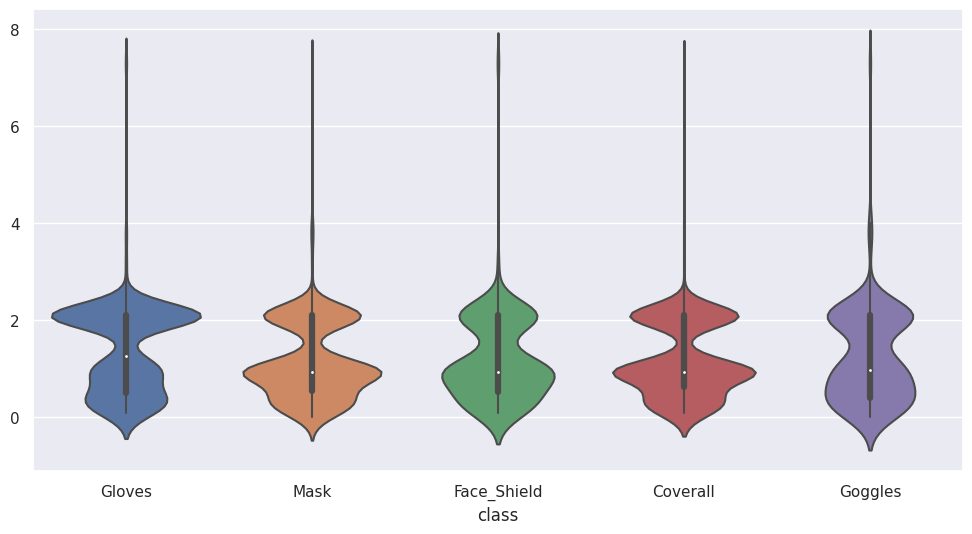

In [32]:
sns.set(rc={'figure.figsize':(12,6)})
sns.violinplot(x=train_df['class'],y=(train_df['width']*train_df['height'])/1e6);

**15. Display Average width and hight + aspect ration of the df**

In [33]:
def get_images_avg_width_height(df, ds_name = 'df'):
    
    wid = df['width'].sum()
    hei = df['height'].sum()
    
    avg_wid = wid // len(df)
    avg_hei = hei // len(df)
    
    print(f"Average width and height for the {ds_name} dataset is {avg_wid}x{avg_hei} with aspect_ratio {avg_wid/avg_hei}")


In [34]:
get_images_avg_width_height(train_df, "train")
get_images_avg_width_height(test_df, "test")

Average width and height for the train dataset is 1343x803 with aspect_ratio 1.672478206724782
Average width and height for the test dataset is 1188x799 with aspect_ratio 1.4868585732165207


**16. Plot sample**

In [35]:
data_df = train_df.copy()
data_df['file'] = train_path + '/' + data_df['filename']
data_df.head()

filename  width  height        class  xmin  ymin  xmax  ymax  \
0  snap07301.jpg   1920    1088       Gloves   769   568   835   680   
1  snap07301.jpg   1920    1088       Gloves   988   557  1043   681   
2  snap07301.jpg   1920    1088         Mask   870   151   929   226   
3  snap07301.jpg   1920    1088  Face_Shield   842   105   951   244   
4  snap07301.jpg   1920    1088     Coverall   748    58  1060   954   

                                                file  
0  /kaggle/input/object-detection-for-ppe-covid19...  
1  /kaggle/input/object-detection-for-ppe-covid19...  
2  /kaggle/input/object-detection-for-ppe-covid19...  
3  /kaggle/input/object-detection-for-ppe-covid19...  
4  /kaggle/input/object-detection-for-ppe-covid19...

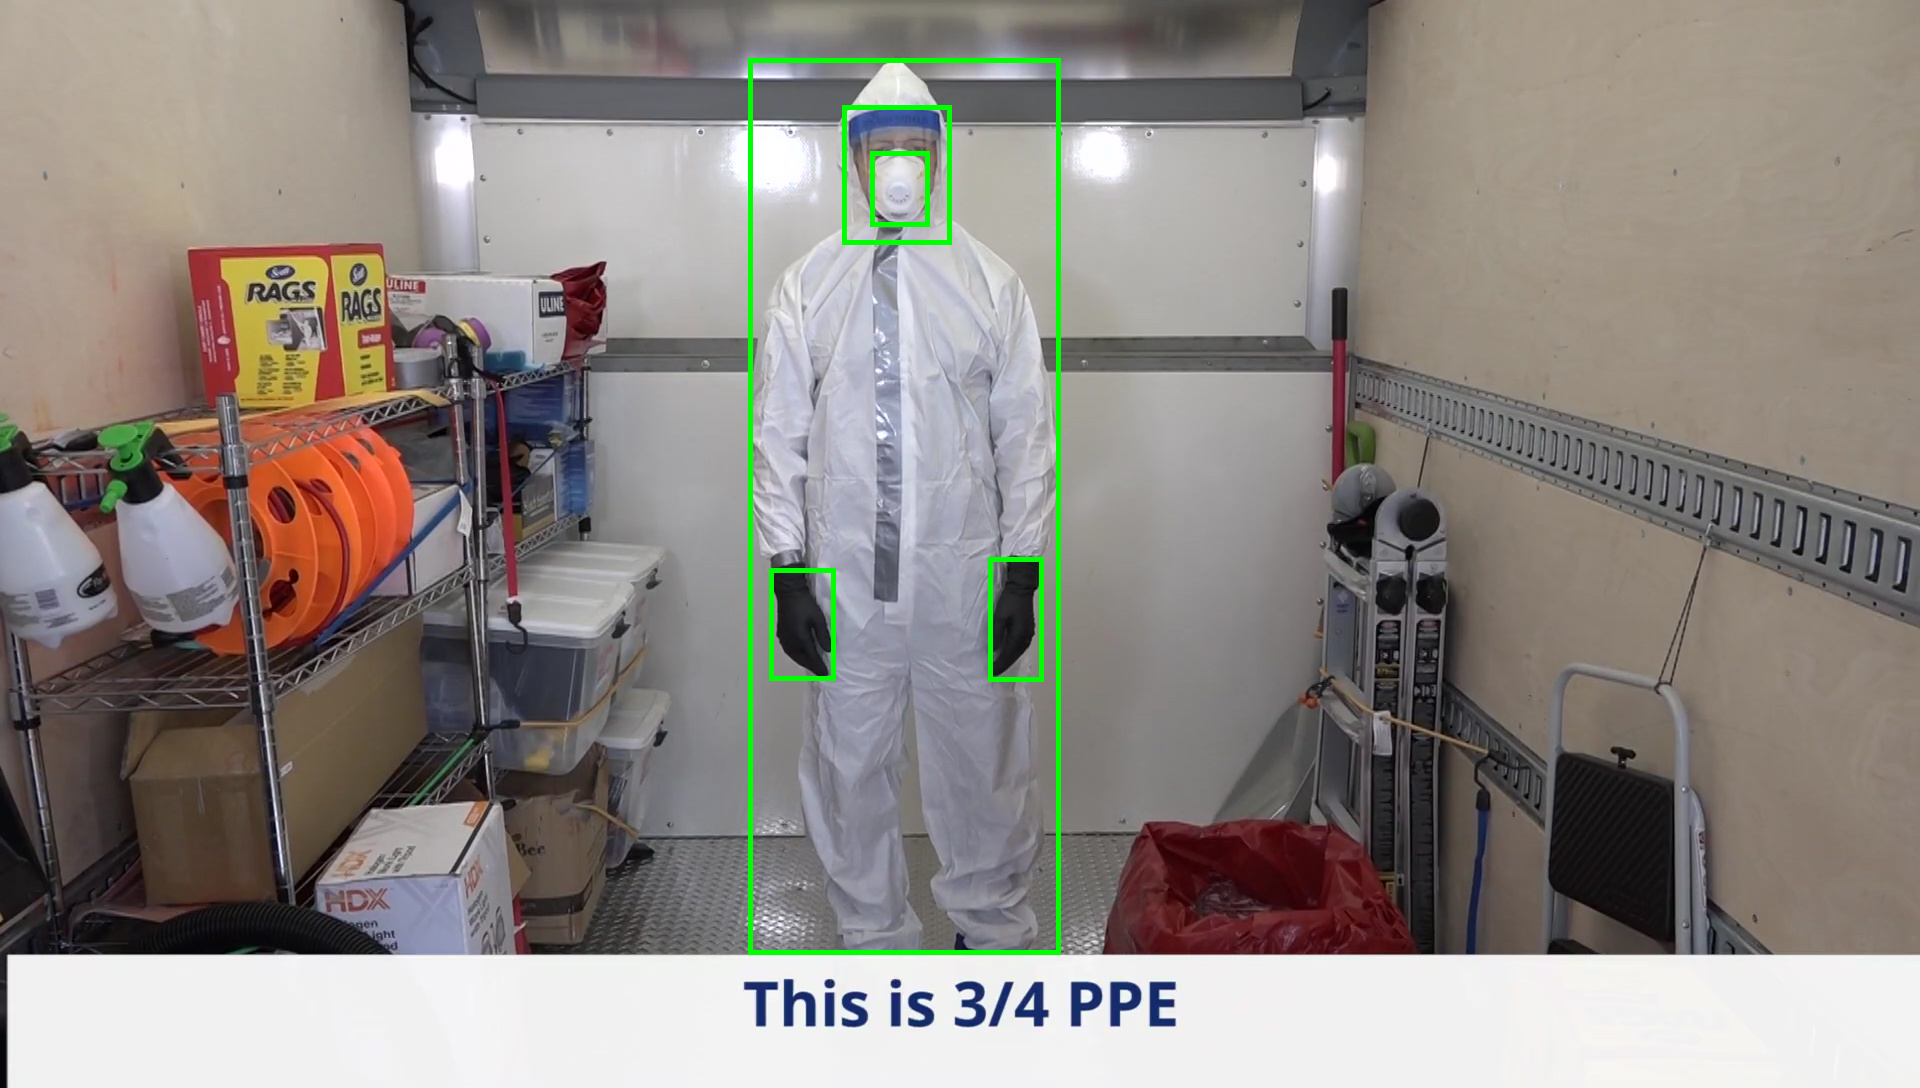

In [36]:
ldf = data_df[data_df['file'] == data_df['file'][0]]

f=ldf.iloc[0].file
img = Image.open(f)
draw = ImageDraw.Draw(img)
xres, yres = img.size[0], img.size[1]

for i in range(len(ldf)):
    
    draw.rectangle([int(ldf.iloc[i]['xmin']),
                            int(ldf.iloc[i]['ymin']),
                            int(ldf.iloc[i]['xmax']),
                            int(ldf.iloc[i]['ymax'])], width=5, outline=(0,255,0))

img

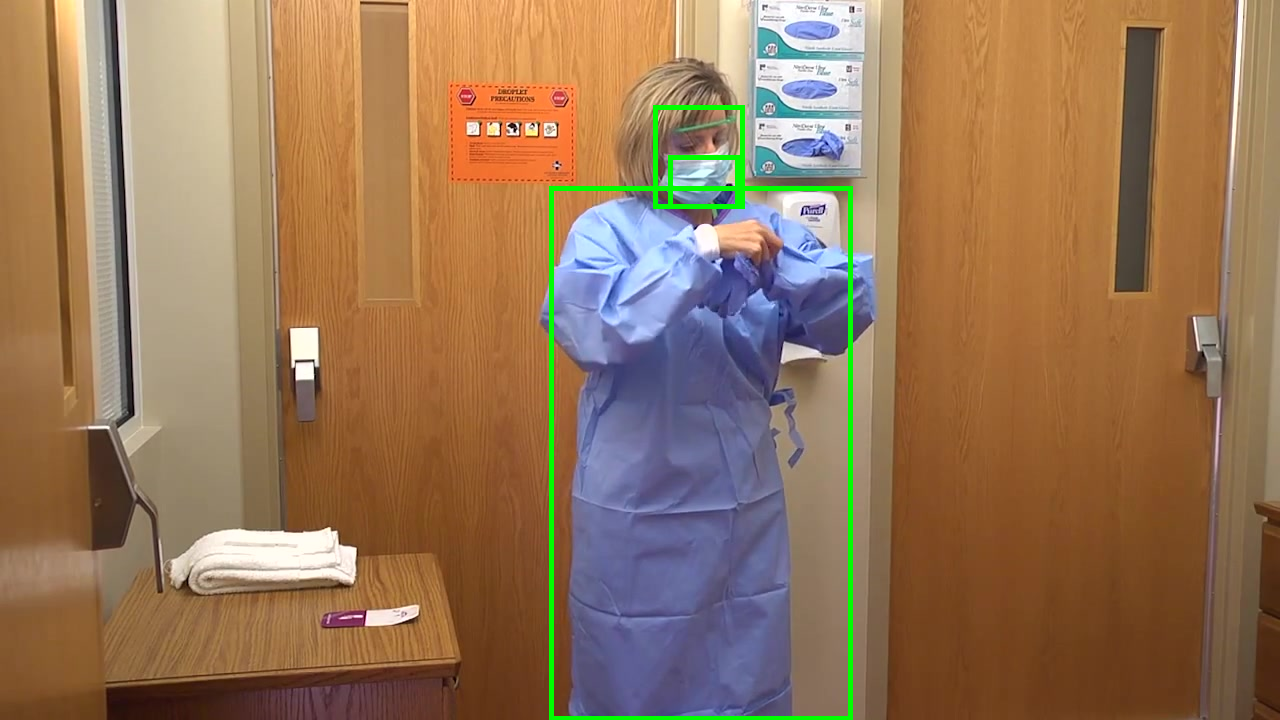

In [37]:
ldf = data_df[data_df['file'] == data_df['file'][10]]

f=ldf.iloc[0].file
img = Image.open(f)
draw = ImageDraw.Draw(img)
xres, yres = img.size[0], img.size[1]

for i in range(len(ldf)):
    
    draw.rectangle([int(ldf.iloc[i]['xmin']),
                            int(ldf.iloc[i]['ymin']),
                            int(ldf.iloc[i]['xmax']),
                            int(ldf.iloc[i]['ymax'])], width=5, outline=(0,255,0))

img

**17. Install Framework**

In [38]:
!git clone https://github.com/ultralytics/yolov5 
!cd yolov5 && pip install -qr requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 16495, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 16495 (delta 30), reused 37 (delta 9), pack-reused 16408
Receiving objects: 100% (16495/16495), 15.16 MiB | 31.42 MiB/s, done.
Resolving deltas: 100% (11290/11290), done.


In [39]:
!pip3 install torch torchvision torchaudio

In [40]:
import torch
print(torch.__version__)

2.1.2


In [41]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

**18. load the testing Model using Ultralytics & Random Image**

In [42]:
# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Image
img = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTdEqF6-Ah4rUKh5FrR2WgR2ly5hJfsHi_vmg&usqp=CAU'

# Inference: object detection
results = model(img)

results.pandas().xyxy[0]

/opt/conda/lib/python3.10/site-packages/torch/hub.py:294: UserWarning:

You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-3-2 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 129MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
WARNING ⚠️ NMS time limi

xmin        ymin        xmax        ymax  confidence  class  \
0    56.273232  102.998489   84.074890  171.181702    0.798512      0   
1   220.382645  131.423752  244.144012  170.002075    0.742680      3   
2    76.561852  111.996223  113.177635  156.195953    0.741733      2   
3   184.610016  115.946541  216.354568  159.589935    0.685949      2   
4   254.632126  101.135124  272.547577  141.660034    0.662428      0   
5   216.707413  112.363945  240.349884  165.682831    0.609886      0   
6    73.432991  101.870964  104.810120  126.248863    0.602263      2   
7   170.578812  127.903961  193.942856  166.032578    0.593960      3   
8   105.408707  103.879974  126.946259  172.994400    0.590290      0   
9     0.088750  136.022980   20.947685  166.593796    0.585610      1   
10    9.305157  110.065994   29.917917  167.020370    0.580521      0   
11  139.623535  100.510689  174.871094  175.768616    0.565379      0   
12  254.406204  132.082184  275.751251  160.079010    0.373249      1   
13   15.989544  122.016418   29.061371  141.866501    0.292673     26   
14  115.089912  108.586945  147.042557  164.924896    0.280391      0   
15  178.100525   97.987549  201.083984  114.223045    0.257953      5   

          name  
0       person  
1   motorcycle  
2          car  
3          car  
4       person  
5       person  
6          car  
7   motorcycle  
8       person  
9      bicycle  
10      person  
11      person  
12     bicycle  
13     handbag  
14      person  
15         bus

In [43]:
results.print()

image 1/1: 183x276 7 persons, 2 bicycles, 3 cars, 2 motorcycles, 1 bus, 1 handbag
Speed: 48.7ms pre-process, 113.8ms inference, 672.1ms NMS per image at shape (1, 3, 448, 640)


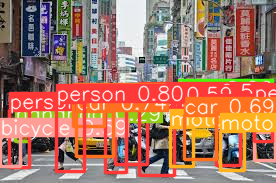

In [44]:
results.show()

**19. Plot image**

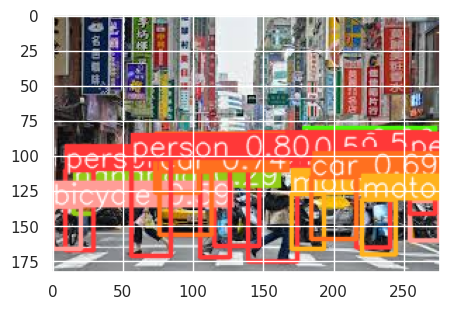

In [45]:
%matplotlib inline
plt.figure(figsize = (5,8))
plt.imshow(np.squeeze(results.render())) # np.squeeze(results.render()).shape
plt.show()

**20. Set all data in the test folder to be accessible from the *original_data* directory**

In [46]:
TEST_FOLDER = "/kaggle/input/object-detection-for-ppe-covid19-dataset/dataset/test"
os.mkdir("/kaggle/working/original_data")
!cp -r {TEST_FOLDER} /kaggle/working/original_data

**21. Separate image files and label files into different directories**

In [47]:
os.mkdir("/kaggle/working/data/")
LABELS = "/kaggle/working/data/labels_xml"
IMAGES = "/kaggle/working/data/images"
os.mkdir(LABELS)
os.mkdir(IMAGES)

import os

TEST_FOLDER = "/kaggle/working/original_data/test"

for img_file in os.listdir(TEST_FOLDER):
    if img_file.endswith(".xml"):
        xml_path = os.path.join(TEST_FOLDER, img_file)
        !cp "$xml_path" "$LABELS"

    if img_file.endswith(".jpg"):
        jpg_path = os.path.join(TEST_FOLDER, img_file)
        !cp "$jpg_path" "$IMAGES"

**22. Converts object annotations in an XML file to a format relative to the image size and writes the information to a text file.**

In [48]:
import glob
import os
import pickle
import xml.etree.ElementTree as ET
from os import listdir, getcwd
from os.path import join

dirs = ['/kaggle/working/original_data/test']
classes = ["Gloves","Mask","Face_Shield","Coverall", "Goggles"]

def getImagesInDir(dir_path):
    image_list = []
    for filename in glob.glob(dir_path + '/*.jpg'):
        image_list.append(filename)

    return image_list

def convert(size, box):
    dw = 1./(size[0])
    dh = 1./(size[1])
    x = (box[0] + box[1])/2.0 - 1
    y = (box[2] + box[3])/2.0 - 1
    w = box[1] - box[0]
    h = box[3] - box[2]
    x = x*dw
    w = w*dw
    y = y*dh
    h = h*dh
    return (x,y,w,h)

def convert_annotation(dir_path, output_path, image_path):
    basename = os.path.basename(image_path)
    basename_no_ext = os.path.splitext(basename)[0]

    in_file = open(dir_path + '/' + basename_no_ext + '.xml')
    out_file = open(output_path + basename_no_ext + '.txt', 'w')
    tree = ET.parse(in_file)
    root = tree.getroot()
    size = root.find('size')
    w = int(size.find('width').text)
    h = int(size.find('height').text)

    for obj in root.iter('object'):
        difficult = obj.find('difficult').text
        cls = obj.find('name').text
        if cls not in classes or int(difficult)==1:
            continue
        cls_id = classes.index(cls)
        xmlbox = obj.find('bndbox')
        b = (float(xmlbox.find('xmin').text), float(xmlbox.find('xmax').text), float(xmlbox.find('ymin').text), float(xmlbox.find('ymax').text))
        bb = convert((w,h), b)
        out_file.write(str(cls_id) + " " + " ".join([str(a) for a in bb]) + '\n')


for dir_path in dirs:
    full_dir_path = dir_path
    output_path =  '/kaggle/working/data/labels/'

    if not os.path.exists(output_path):
        os.makedirs(output_path)

    image_paths = getImagesInDir(full_dir_path)

    for image_path in image_paths:
        convert_annotation(full_dir_path, output_path, image_path)

    print("Finished processing: " + dir_path)

Finished processing: /kaggle/working/original_data/test


In [49]:
import shutil
shutil.rmtree(LABELS)

In [50]:
with open("/kaggle/working/data/labels/ukudtk.txt", "r") as f:
    c = f.read()
print(c)

0 0.6415584415584416 0.7731250000000001 0.2571428571428571 0.43875000000000003
0 0.38506493506493505 0.820625 0.21818181818181817 0.32125
1 0.3691558441558442 0.283125 0.1331168831168831 0.22125
4 0.36883116883116884 0.16125 0.16233766233766234 0.1325
3 0.3568181818181818 0.498125 0.5772727272727273 0.9862500000000001



**23. Organize the data and create files necessary for subsequent processes in the object detection pipeline**

In [51]:
import yaml

features = {
    'path':"/kaggle/working/data",
    'train': "images",
    'val': "images",
    'test': None,
    "names":{   
        0:"Gloves",
        1:"Mask",
        2:"Face_Shield",
        3:"Coverall",
        4:"Goggles"
    }
}

file_path = "/kaggle/working/yolov5/dataset.yaml"

with open(file_path, "w") as f:
    yaml.dump(features, f)

print("Fitur di tulis:", file_path)

Fitur di tulis: /kaggle/working/yolov5/dataset.yaml


In [52]:
with open("/kaggle/working/yolov5/dataset.yaml", "r") as f:
    content = f.read()

print(content)

names:
  0: Gloves
  1: Mask
  2: Face_Shield
  3: Coverall
  4: Goggles
path: /kaggle/working/data
test: null
train: images
val: images



In [53]:
with open("/kaggle/working/data/labels/classes.txt", "w", encoding="utf-8") as f:
    f.write("Gloves\n")
    f.write("Mask\n")
    f.write("Face_Shield\n")
    f.write("Coverall\n")
    f.write("Goggles")

In [54]:
with open("/kaggle/working/data/labels/classes.txt", "r") as f:
    content = f.read()
print(content)

Gloves
Mask
Face_Shield
Coverall
Goggles


**24. Training a YOLOv5 object detection model.**

In [55]:
!pip install comet_ml 
!export COMET_API_KEY= "gSW0NwFak28ns1sG445CihYLT"  
!export COMET_PROJECT_NAME= "yolov5"
!cd /kaggle/working/yolov5/ && python train.py --img 640 --epochs 300 --data dataset.yaml --weights yolov5s.pt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.7/611.7 kB 4.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 514.7/514.7 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 29.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: websocket-client
    Found existing installation: websocket-client 1.7.0
    Uninstalling websocket-client-1.7.0:
      Successfully uninstalled websocket-client-1.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab 4.1.2 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.0.3 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported 

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-3-2 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


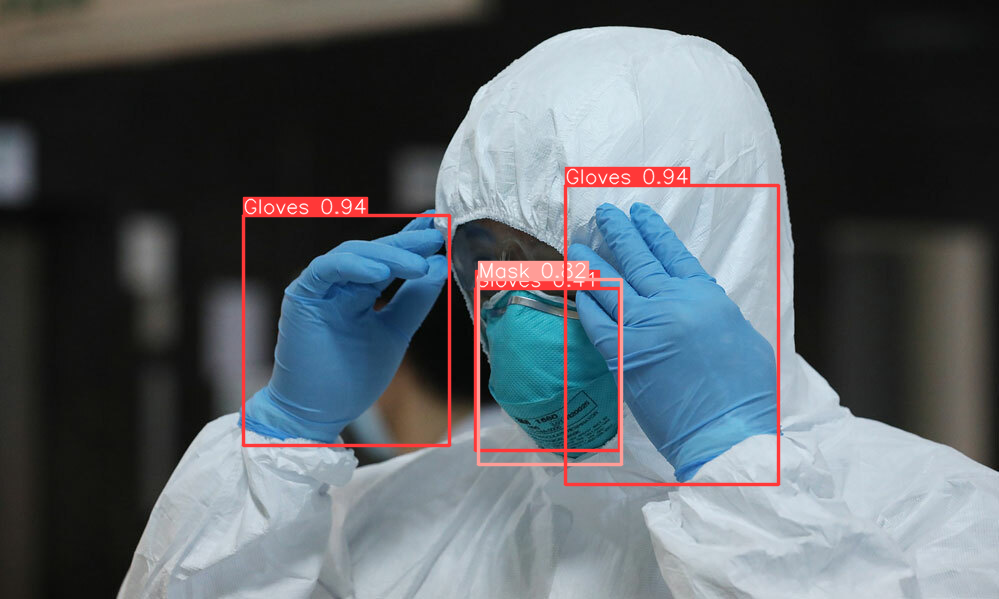

In [56]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path= "/kaggle/working/yolov5/runs/train/exp/weights/last.pt", force_reload = True)
results = model("/kaggle/input/object-detection-for-ppe-covid19-dataset/dataset/train/58i.jpg")
results.show()